In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\kesha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 561 samples, validate on 141 samples
Epoch 1/20
561/561 [==============================] - 36s 63ms/step - loss: 0.7583 - accuracy: 0.4866 - val_loss: 0.6947 - val_accuracy: 0.4610
Epoch 2/20
561/561 [==============================] - 32s 57ms/step - loss: 0.6862 - accuracy: 0.5615 - val_loss: 0.6512 - val_accuracy: 0.5532
Epoch 3/20
561/561 [==============================] - 35s 63ms/step - loss: 0.5789 - accuracy: 0.7077 - val_loss: 0.5427 - val_accuracy: 0.6950
Epoch 4/20
561/561 [==============================] - 34s 60ms/step - loss: 0.4321 - accuracy: 0.8111 - val_loss: 0.4832 - val_accuracy: 0.7447
Epoch 5/20
561/561 [==============================] - 31s 55ms/step - loss: 0.4244 - accuracy: 0.8111 - val_loss: 0.4368 - val_accuracy: 0.7872
Epoch 6/20
561/561 [==============================] - 34s 60ms/step - loss: 0.3390 - accuracy: 0.8485 - val_loss: 0.3662 - val_accuracy: 0.8652
Epoch 7/20
561/561 [==============================] - 31s 56ms/step - loss: 0.2631 - accur

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

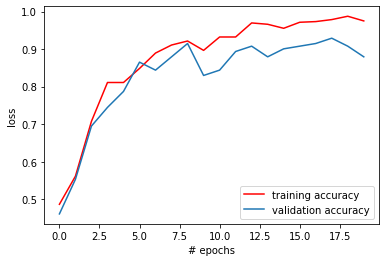

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

79/79 [==============================] - 1s 16ms/step
[0.3503074076356767, 0.8734177350997925]


In [19]:
from keras.models import load_model
models = load_model('Final.h5')

In [8]:
model.save("Final.h5")

In [22]:
models.predict(train_data[100].reshape((1,100,100,1)))

array([[0.99773884, 0.0022612 ]], dtype=float32)

ValueError: x and y can be no greater than 2-D, but have shapes (100,) and (100, 100, 1)

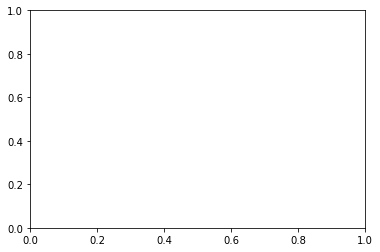

In [18]:
plt.plot(train_data[0])

In [15]:
import cv2